In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

happines_data = pd.read_csv('world-happiness-report/2019.csv', parse_dates=True, encoding = "cp1252")
happines_data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [13]:
happines_data.columns

Index(['Overall rank', 'Country or region', 'Score', 'GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

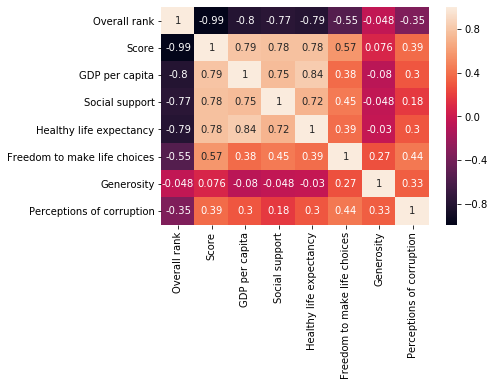

In [18]:
sns.heatmap(happines_data.corr(), annot=True)

In [14]:
X = happines_data[['GDP per capita',
                     'Social support', 
                     'Healthy life expectancy',
                     'Freedom to make life choices',
                     'Generosity',
                     'Perceptions of corruption']]

y = happines_data['Score']

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression


lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [40]:
print(lm.intercept_)

1.748268030055025


In [41]:
pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

,Coefficient
GDP per capita,0.764165
Social support,1.415817
Healthy life expectancy,0.835840
Freedom to make life choices,1.242696
Generosity,0.240154
Perceptions of corruption,1.328445


# Predictions

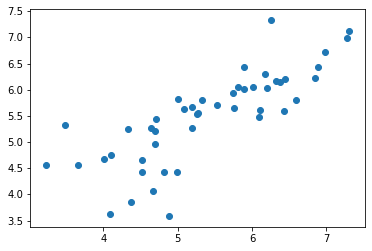

In [43]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

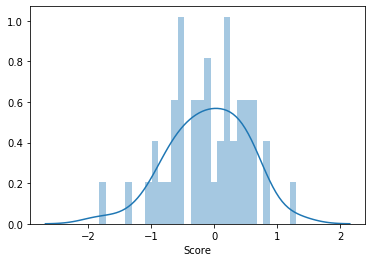

In [44]:
sns.distplot((y_test-predictions),bins=30);

In [45]:
from sklearn import metrics


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.49773500069442494
Mean Squared Error: 0.3831004356072633
Root Mean Squared Error: 0.6189510769093656


# Score

In [52]:
lm.score(X_test, y_test)

0.6235713838226105